In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example file loading
participants_df = pd.read_csv('participants.csv')
clusters_df = pd.read_csv('clusters.csv')
icbdata_df = pd.read_csv('ICBData.csv')
switchstates_df = pd.read_csv('switchstates.csv')
evtripdata_df = pd.read_csv('evtripdata.csv')
evchargedata_df = pd.read_csv('evchargedata.csv')

# Quick summary of datasets
print(participants_df.info())
print(participants_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ParticipantID           224 non-null    object 
 1   ICB_ID                  92 non-null     float64
 2   MC_ID                   106 non-null    float64
 3   DistanceFromSubstation  92 non-null     float64
 4   ExpectedPhase           92 non-null     float64
 5   ActualPhase             92 non-null     float64
 6   EVDeliveryDate          218 non-null    object 
 7   LeaseEndDate            218 non-null    object 
 8   DecommissionDate        92 non-null     object 
 9   ParticipantExitDate     3 non-null      object 
 10  Location                224 non-null    object 
dtypes: float64(5), object(6)
memory usage: 19.4+ KB
None
  ParticipantID   ICB_ID    MC_ID  DistanceFromSubstation  ExpectedPhase  \
0          BL01  14522.0  14648.0                   292.0            1.0

In [ ]:
import os
print(os.listdir())


['.config', 'clusters.csv', 'participants.csv', 'switchstates.csv', 'evchargedata.csv', 'evtripdata.csv', 'ICBData.csv', 'sample_data']


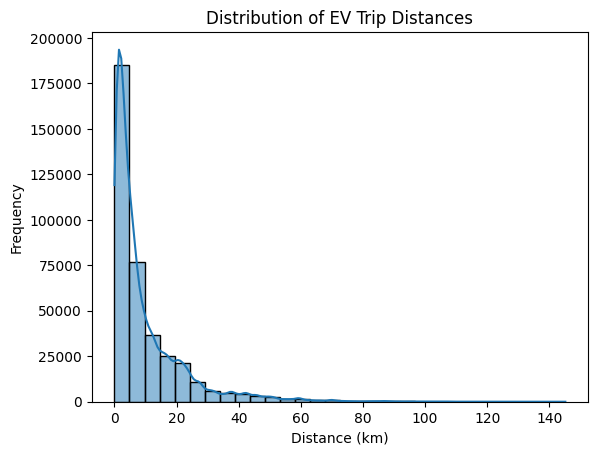

In [ ]:
# Convert 'TripDistance (m)' to kilometers for better readability
evtripdata_df['TripDistance_km'] = evtripdata_df['TripDistance (m)'] / 1000

# Plot the distribution of trip distances
sns.histplot(evtripdata_df['TripDistance_km'].dropna(), kde=True, bins=30)
plt.title('Distribution of EV Trip Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
print(evtripdata_df.columns)


Index(['ParticipantID', 'TripStartDateTime', 'TripStopDateTime',
       'TripDistance (m)', 'Power Consumption (Wh)',
       'Odometer at trip start (km)', 'TripDistance_km'],
      dtype='object')


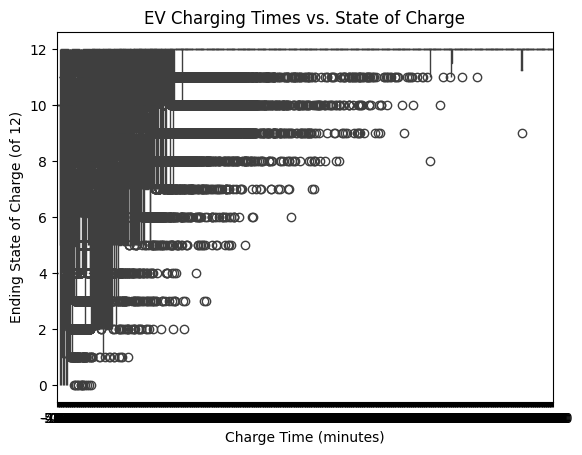

In [ ]:
# Convert start and stop times to datetime
evchargedata_df['BatteryChargeStartDate'] = pd.to_datetime(evchargedata_df['BatteryChargeStartDate'])
evchargedata_df['BatteryChargeStopDate'] = pd.to_datetime(evchargedata_df['BatteryChargeStopDate'])

# Calculate charge time in minutes
evchargedata_df['ChargeTime'] = (evchargedata_df['BatteryChargeStopDate'] - evchargedata_df['BatteryChargeStartDate']).dt.total_seconds() / 60

sns.boxplot(data=evchargedata_df, x='ChargeTime', y='Ending SoC (of 12)')
plt.title('EV Charging Times vs. State of Charge')
plt.xlabel('Charge Time (minutes)')
plt.ylabel('Ending State of Charge (of 12)')
plt.show()



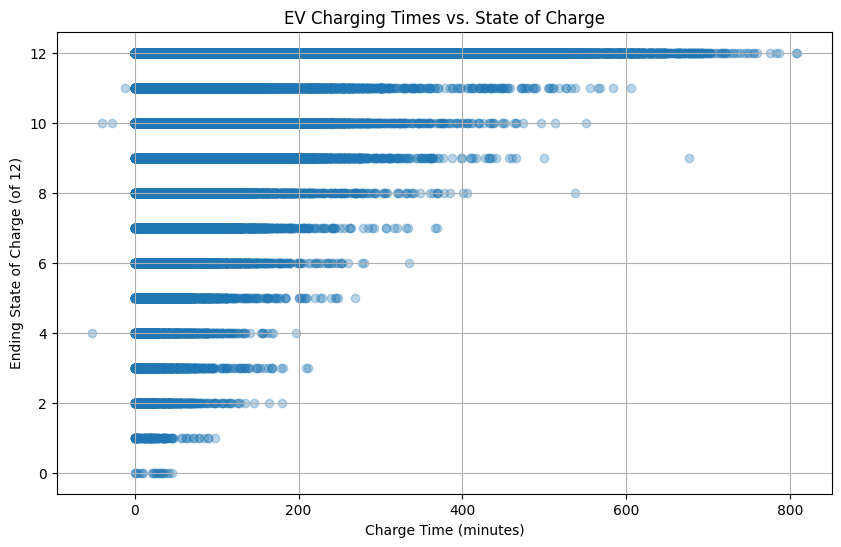

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(evchargedata_df['ChargeTime'], evchargedata_df['Ending SoC (of 12)'], alpha=0.3)
plt.title('EV Charging Times vs. State of Charge')
plt.xlabel('Charge Time (minutes)')
plt.ylabel('Ending State of Charge (of 12)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


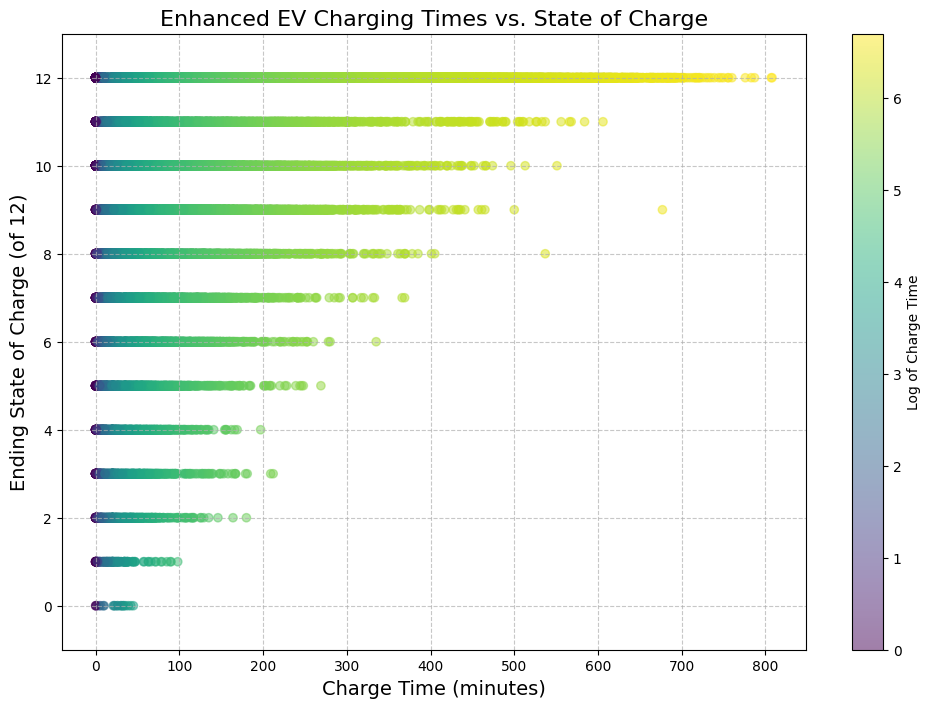

In [ ]:
import numpy as np

plt.figure(figsize=(12, 8))

# Scatter plot with density-based color
plt.scatter(
    evchargedata_df['ChargeTime'],
    evchargedata_df['Ending SoC (of 12)'],
    c=np.log1p(evchargedata_df['ChargeTime']),  # Color by log of ChargeTime
    cmap='viridis',
    alpha=0.5
)

# Adjust y-axis limit
plt.ylim(-1, 13)

# Labels, title, and colorbar
plt.title('Enhanced EV Charging Times vs. State of Charge', fontsize=16)
plt.xlabel('Charge Time (minutes)', fontsize=14)
plt.ylabel('Ending State of Charge (of 12)', fontsize=14)
plt.colorbar(label='Log of Charge Time')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


<ipython-input-11-a7303df63be6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = evchargedata_df.groupby('ChargeTimeCategory')['Ending SoC (of 12)'].mean().reset_index()
<ipython-input-11-a7303df63be6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChargeTimeCategory', y='Ending SoC (of 12)', data=binned_data, palette='viridis')


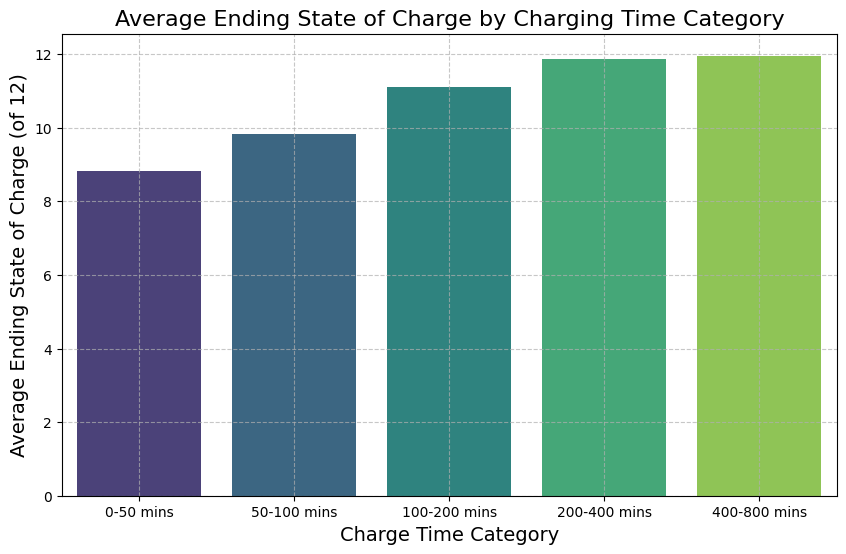

In [ ]:
# Bin ChargeTime into categories
bins = [0, 50, 100, 200, 400, 800]  # Define bin ranges in minutes
labels = ['0-50 mins', '50-100 mins', '100-200 mins', '200-400 mins', '400-800 mins']
evchargedata_df['ChargeTimeCategory'] = pd.cut(evchargedata_df['ChargeTime'], bins=bins, labels=labels)

# Calculate average Ending SoC for each bin
binned_data = evchargedata_df.groupby('ChargeTimeCategory')['Ending SoC (of 12)'].mean().reset_index()

# Bar plot for average Ending SoC by ChargeTimeCategory
plt.figure(figsize=(10, 6))
sns.barplot(x='ChargeTimeCategory', y='Ending SoC (of 12)', data=binned_data, palette='viridis')
plt.title('Average Ending State of Charge by Charging Time Category', fontsize=16)
plt.xlabel('Charge Time Category', fontsize=14)
plt.ylabel('Average Ending State of Charge (of 12)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(evchargedata_df.columns)


Index(['ParticipantID', 'BatteryChargeStartDate', 'BatteryChargeStopDate',
       'Starting SoC (of 12)', 'Ending SoC (of 12)', 'ChargeTime',
       'ChargeTimeCategory'],
      dtype='object')


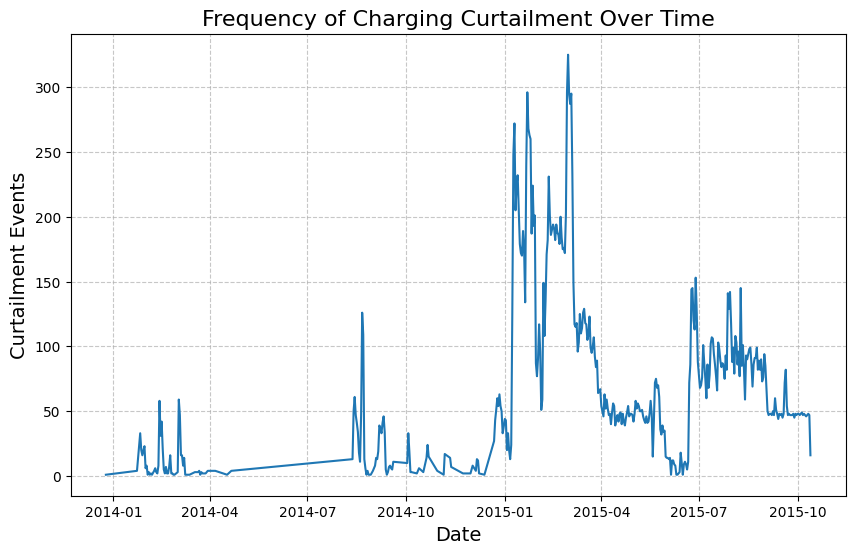

In [ ]:
# Convert 'TimeStamp' to datetime
switchstates_df['TimeStamp'] = pd.to_datetime(switchstates_df['TimeStamp'])

# Extract the date from the timestamp
switchstates_df['Date'] = switchstates_df['TimeStamp'].dt.date

# Filter for curtailment events (SwitchState == 'Off')
curtailment_events = switchstates_df[switchstates_df['SwitchState'] == 'Off']

# Group by date and count events
curtailment_events.groupby('Date').size().plot(kind='line', figsize=(10, 6))

# Add labels and title
plt.title('Frequency of Charging Curtailment Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Curtailment Events', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [ ]:
print(switchstates_df.columns)


Index(['ParticipantID', 'ICBSerialNumber', 'TimeStamp', 'SwitchState', 'Date'], dtype='object')


In [ ]:
# Merge EVTripData and Participants datasets on ParticipantID
merged_df = pd.merge(evtripdata_df, participants_df, on='ParticipantID')

# Convert TripStartDateTime and TripStopDateTime to datetime
merged_df['TripStartDateTime'] = pd.to_datetime(merged_df['TripStartDateTime'])
merged_df['TripStopDateTime'] = pd.to_datetime(merged_df['TripStopDateTime'])

# Calculate trip duration in minutes
merged_df['TripDuration'] = (merged_df['TripStopDateTime'] - merged_df['TripStartDateTime']).dt.total_seconds() / 60

# Group by ParticipantID to calculate metrics
participant_metrics = merged_df.groupby('ParticipantID').agg({
    'TripDistance (m)': ['count', 'mean', 'sum'],  # Trip count, average distance, total distance
    'TripDuration': ['mean', 'sum'],             # Average and total trip duration
}).reset_index()

# Rename columns for clarity
participant_metrics.columns = ['ParticipantID', 'TripCount', 'AvgDistance_m', 'TotalDistance_m', 'AvgDuration_min', 'TotalDuration_min']

# Display metrics
print(participant_metrics.head())


  ParticipantID  TripCount  AvgDistance_m  TotalDistance_m  AvgDuration_min  \
0          BL01       1320   13454.273485       17759641.0        20.732361   
1          BL02       1395   13293.526165       18544469.0        20.507551   
2          BL03        921   12400.700326       11421045.0        17.996652   
3          BL04       2114    7988.948912       16888638.0        12.456079   
4          BL05       1318   10183.169196       13421417.0        17.450999   

   TotalDuration_min  
0       27366.716667  
1       28608.033333  
2       16574.916667  
3       26332.150000  
4       23000.416667  


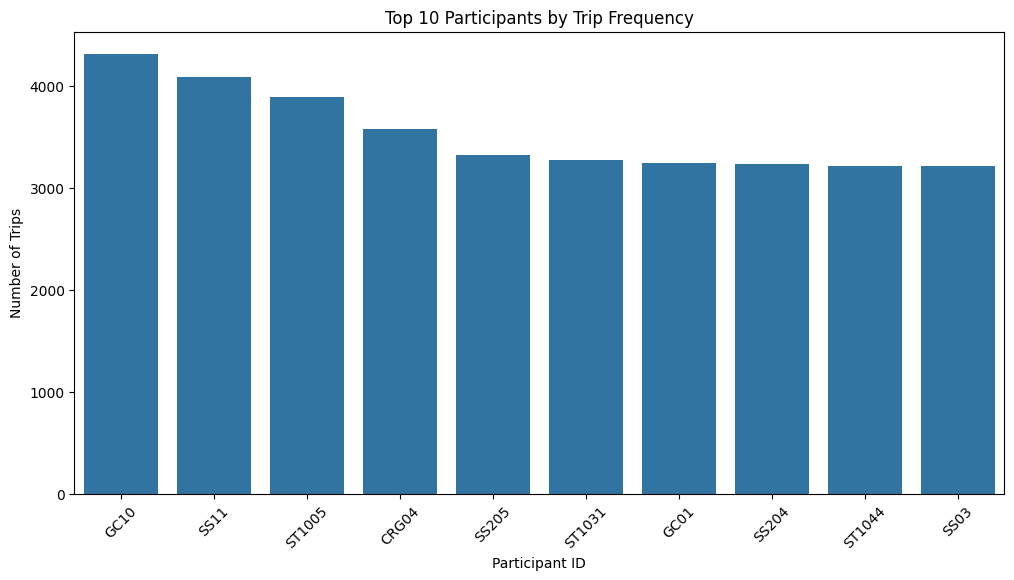

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ParticipantID', y='TripCount', data=participant_metrics.sort_values('TripCount', ascending=False)[:10])
plt.title('Top 10 Participants by Trip Frequency')
plt.xlabel('Participant ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


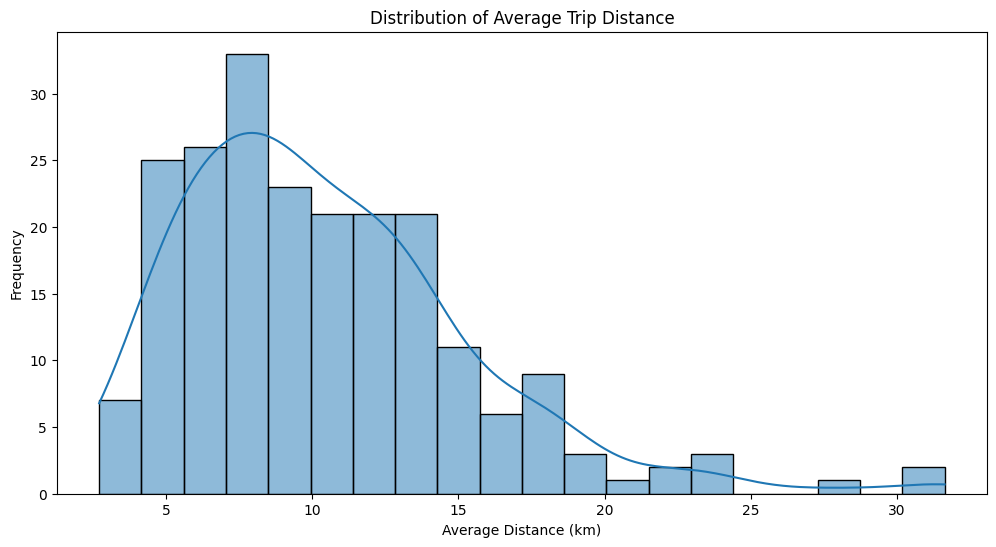

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(participant_metrics['AvgDistance_m'] / 1000, kde=True, bins=20)
plt.title('Distribution of Average Trip Distance')
plt.xlabel('Average Distance (km)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-18-44bc1946b427>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = merged_df.groupby('DurationCategory')['TripDistance (m)'].mean().reset_index()
<ipython-input-18-44bc1946b427>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DurationCategory', y='TripDistance (m)', data=binned_data, palette='viridis')


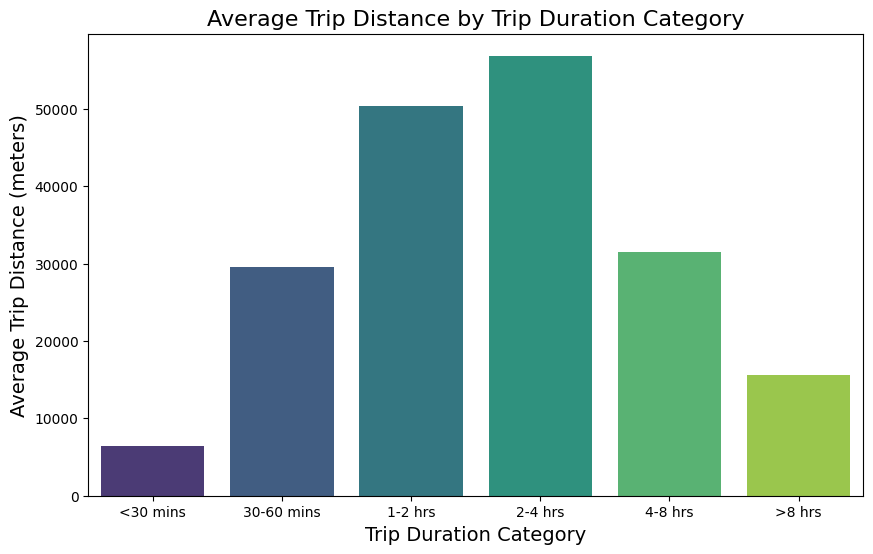

In [ ]:
# Bin durations into categories (e.g., 0-30 mins, 30-60 mins, etc.)
bins = [0, 30, 60, 120, 240, 480, 1440]  # In minutes
labels = ['<30 mins', '30-60 mins', '1-2 hrs', '2-4 hrs', '4-8 hrs', '>8 hrs']
merged_df['DurationCategory'] = pd.cut(merged_df['TripDuration'], bins=bins, labels=labels)

# Calculate average distance per bin
binned_data = merged_df.groupby('DurationCategory')['TripDistance (m)'].mean().reset_index()

# Bar plot for average distance per duration bin
plt.figure(figsize=(10, 6))
sns.barplot(x='DurationCategory', y='TripDistance (m)', data=binned_data, palette='viridis')
plt.title('Average Trip Distance by Trip Duration Category', fontsize=16)
plt.xlabel('Trip Duration Category', fontsize=14)
plt.ylabel('Average Trip Distance (meters)', fontsize=14)
plt.show()





In [ ]:
# Merge Clusters data with EVChargeData and EVTripData using 'Name' and 'ParticipantID'
cluster_charging_data = pd.merge(
    clusters_df, evchargedata_df, left_on='Name', right_on='ParticipantID'
)

cluster_driving_data = pd.merge(
    clusters_df, evtripdata_df, left_on='Name', right_on='ParticipantID'
)

# Charging behavior by cluster
charging_metrics = cluster_charging_data.groupby('Prefix').agg({
    'ChargeTime': ['mean', 'sum'],        # Average and total charging time
    'Ending SoC (of 12)': 'mean',         # Average ending state of charge
}).reset_index()

# Driving behavior by cluster
cluster_driving_data['TripDuration'] = (
    pd.to_datetime(cluster_driving_data['TripStopDateTime']) -
    pd.to_datetime(cluster_driving_data['TripStartDateTime'])
).dt.total_seconds() / 60  # Calculate trip duration in minutes

driving_metrics = cluster_driving_data.groupby('Prefix').agg({
    'TripDistance (m)': ['mean', 'sum'],  # Average and total trip distance
    'TripDuration': 'mean',              # Average trip duration
}).reset_index()

# Rename columns for clarity
charging_metrics.columns = ['ClusterID', 'AvgChargeTime_min', 'TotalChargeTime_min', 'AvgEndingSOC']
driving_metrics.columns = ['ClusterID', 'AvgTripDistance_m', 'TotalTripDistance_m', 'AvgTripDuration_min']

# Merge the charging and driving metrics
cluster_metrics = pd.merge(charging_metrics, driving_metrics, on='ClusterID')
print(cluster_metrics)



Empty DataFrame
Columns: [ClusterID, AvgChargeTime_min, TotalChargeTime_min, AvgEndingSOC, AvgTripDistance_m, TotalTripDistance_m, AvgTripDuration_min]
Index: []


In [ ]:
print(clusters_df.columns)
print(evchargedata_df.columns)
print(evtripdata_df.columns)


Index(['Prefix', 'Name', 'MC_ID', 'DNO', 'MCInstallationDate',
       'NumberOfHousesOnFeeder', 'CableRating', 'EVClusterSize'],
      dtype='object')
Index(['ParticipantID', 'BatteryChargeStartDate', 'BatteryChargeStopDate',
       'Starting SoC (of 12)', 'Ending SoC (of 12)', 'ChargeTime',
       'ChargeTimeCategory'],
      dtype='object')
Index(['ParticipantID', 'TripStartDateTime', 'TripStopDateTime',
       'TripDistance (m)', 'Power Consumption (Wh)',
       'Odometer at trip start (km)', 'TripDistance_km'],
      dtype='object')


In [ ]:
# Check the unique values in the Name column
print("Clusters Name:", clusters_df['Name'].unique())

# Check the unique values in the ParticipantID column
print("EVChargeData ParticipantID:", evchargedata_df['ParticipantID'].unique())
print("EVTripData ParticipantID:", evtripdata_df['ParticipantID'].unique())



Clusters Name: ['Lyndhurst' 'Chiswick' 'Chineham' 'South Gosforth' 'Whiteley' 'Marlow'
 'South Shields 1' 'South Shields 2' 'Social Trial'
 'Slough - Social Trial' 'Wylam' 'Your Homes']
EVChargeData ParticipantID: ['GC10' 'WC07' 'SS05' 'MC01' 'GC03' 'GC08' 'ST1011' 'ST1004' 'ST1000'
 'ST1003' 'ST1014' 'ST1002' 'ST1021' 'ST1018' 'ST1032' 'WC06' 'SS10'
 'GC05' 'MC05' 'SS09' 'JD03' 'MC09' 'SS03' 'GC04' 'ST1006' 'SS01' 'ST1001'
 'ST1013' 'ST1010' 'ST1034' 'ST1019' 'ST1007' 'ST1017' 'ST1029' 'ST1023'
 'ST1027' 'ST1028' 'CRG10' 'ST1012' 'ST1048' 'ST1030' 'ST1052' 'ST1056'
 'ST1064' 'ST1038' 'ST1057' 'CRG04' 'ST1035' 'BL03' 'WC09' 'SS07' 'JD02'
 'JD09' 'ST1037' 'ST1039' 'ST1044' 'ST1042' 'ST1043' 'ST1047' 'ST1041'
 'JD11' 'ST1051' 'CC09' 'ST1059' 'ST1046' 'ST1009' 'ST1058' 'SS201'
 'ST1065' 'ST1063' 'ST1060' 'ST1045' 'ST1055' 'ST1050' 'YH04' 'ST1053'
 'ST1049' 'ST1061' 'ST1070' 'BL02' 'SW10' 'ST1071' 'ST1066' 'ST1083'
 'ST1096' 'BL04' 'ST1054' 'SW06' 'SS206' 'ST1082' 'ST1107' 'ST1087'
 'ST106

In [ ]:
# Extract the prefix from ParticipantID for grouping
evchargedata_df['Prefix'] = evchargedata_df['ParticipantID'].str[:2]
evtripdata_df['Prefix'] = evtripdata_df['ParticipantID'].str[:2]

# Merge Clusters data with EVChargeData and EVTripData using Prefix
cluster_charging_data = pd.merge(clusters_df, evchargedata_df, on='Prefix')
cluster_driving_data = pd.merge(clusters_df, evtripdata_df, on='Prefix')

# Charging behavior by cluster
charging_metrics = cluster_charging_data.groupby('Name').agg({
    'ChargeTime': ['mean', 'sum'],        # Average and total charging time
    'Ending SoC (of 12)': 'mean',         # Average ending state of charge
}).reset_index()

# Driving behavior by cluster
cluster_driving_data['TripDuration'] = (
    pd.to_datetime(cluster_driving_data['TripStopDateTime']) -
    pd.to_datetime(cluster_driving_data['TripStartDateTime'])
).dt.total_seconds() / 60  # Calculate trip duration in minutes

driving_metrics = cluster_driving_data.groupby('Name').agg({
    'TripDistance (m)': ['mean', 'sum'],  # Average and total trip distance
    'TripDuration': 'mean',              # Average trip duration
}).reset_index()

# Rename columns for clarity
charging_metrics.columns = ['ClusterID', 'AvgChargeTime_min', 'TotalChargeTime_min', 'AvgEndingSOC']
driving_metrics.columns = ['ClusterID', 'AvgTripDistance_m', 'TotalTripDistance_m', 'AvgTripDuration_min']

# Merge the charging and driving metrics
cluster_metrics = pd.merge(charging_metrics, driving_metrics, on='ClusterID')
print(cluster_metrics)


               ClusterID  AvgChargeTime_min  TotalChargeTime_min  \
0               Chiswick         179.293320             185210.0   
1              Lyndhurst         158.987342             364240.0   
2                 Marlow         179.487262             443872.0   
3  Slough - Social Trial         207.785829             519049.0   
4           Social Trial         185.300384            7670880.0   
5         South Gosforth         157.418881             621962.0   
6        South Shields 1         166.715697            1383907.0   
7               Whiteley         182.102895             691991.0   
8                  Wylam         181.982180             694444.0   
9             Your Homes         215.244116             786502.0   

   AvgEndingSOC  AvgTripDistance_m  TotalTripDistance_m  AvgTripDuration_min  
0     11.073572        6339.749592         5.055950e+07            17.186520  
1     11.314273       10547.585344         9.398953e+07            16.660457  
2     11.20905

<ipython-input-23-04ab97381dc6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ClusterID', y='AvgChargeTime_min', data=cluster_metrics, palette='viridis')


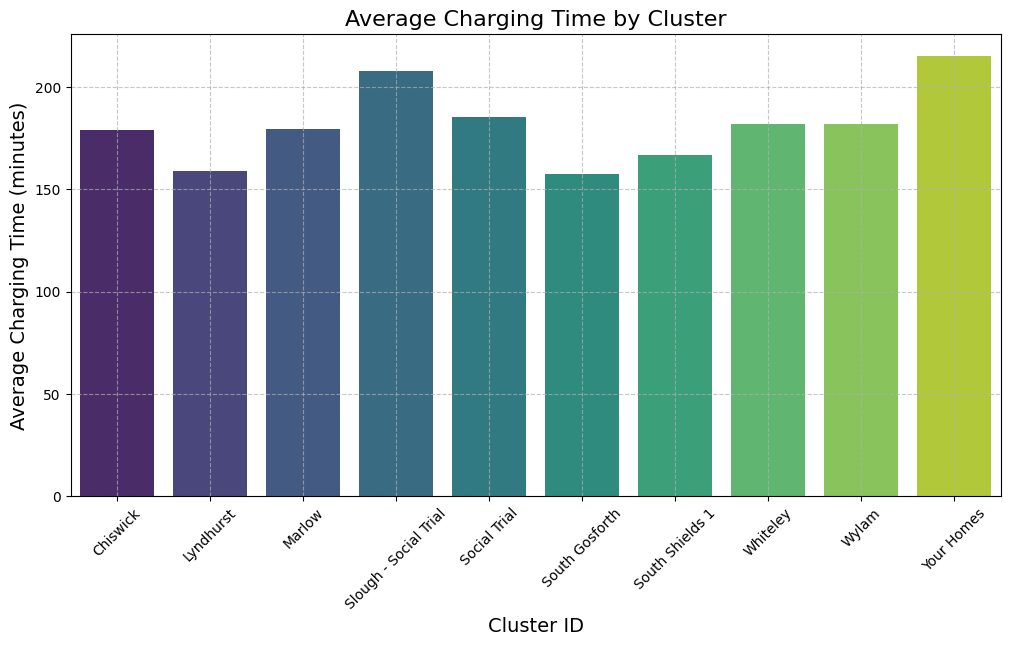

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ClusterID', y='AvgChargeTime_min', data=cluster_metrics, palette='viridis')
plt.title('Average Charging Time by Cluster', fontsize=16)
plt.xlabel('Cluster ID', fontsize=14)
plt.ylabel('Average Charging Time (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-24-d6fb1c661503>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ClusterID', y='AvgEndingSOC', data=cluster_metrics, palette='viridis')


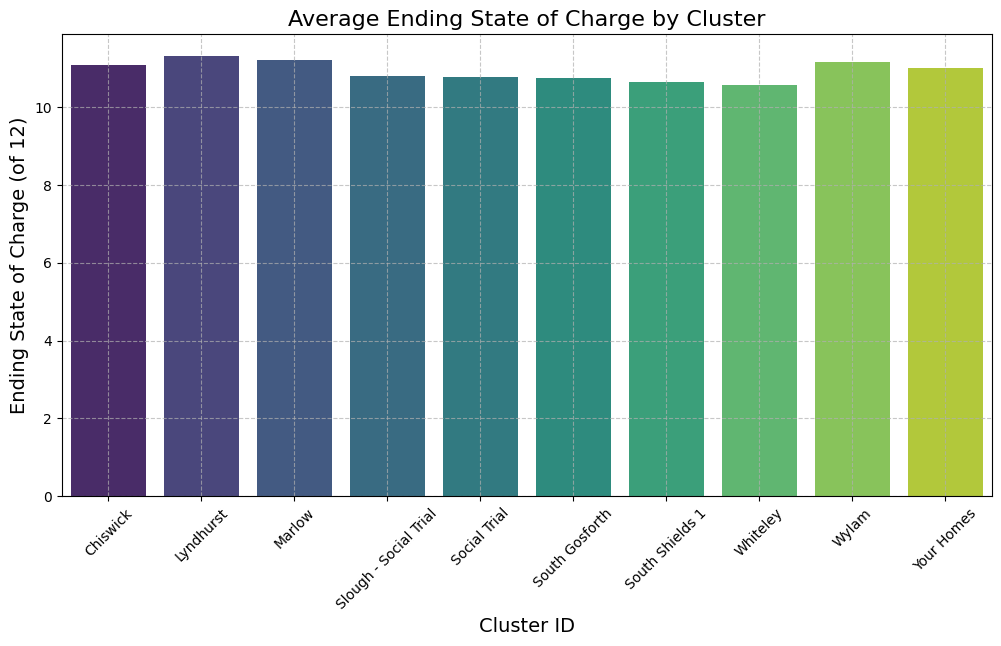

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ClusterID', y='AvgEndingSOC', data=cluster_metrics, palette='viridis')
plt.title('Average Ending State of Charge by Cluster', fontsize=16)
plt.xlabel('Cluster ID', fontsize=14)
plt.ylabel('Ending State of Charge (of 12)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-25-9d2607320721>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ClusterID', y='AvgTripDistance_m', data=cluster_metrics, palette='viridis')


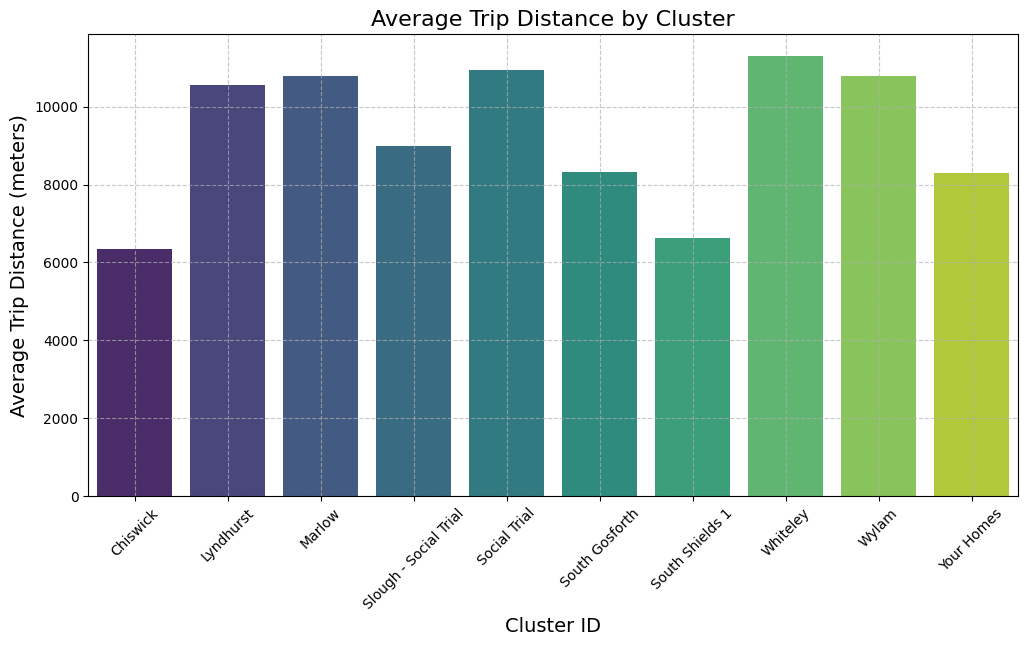

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ClusterID', y='AvgTripDistance_m', data=cluster_metrics, palette='viridis')
plt.title('Average Trip Distance by Cluster', fontsize=16)
plt.xlabel('Cluster ID', fontsize=14)
plt.ylabel('Average Trip Distance (meters)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


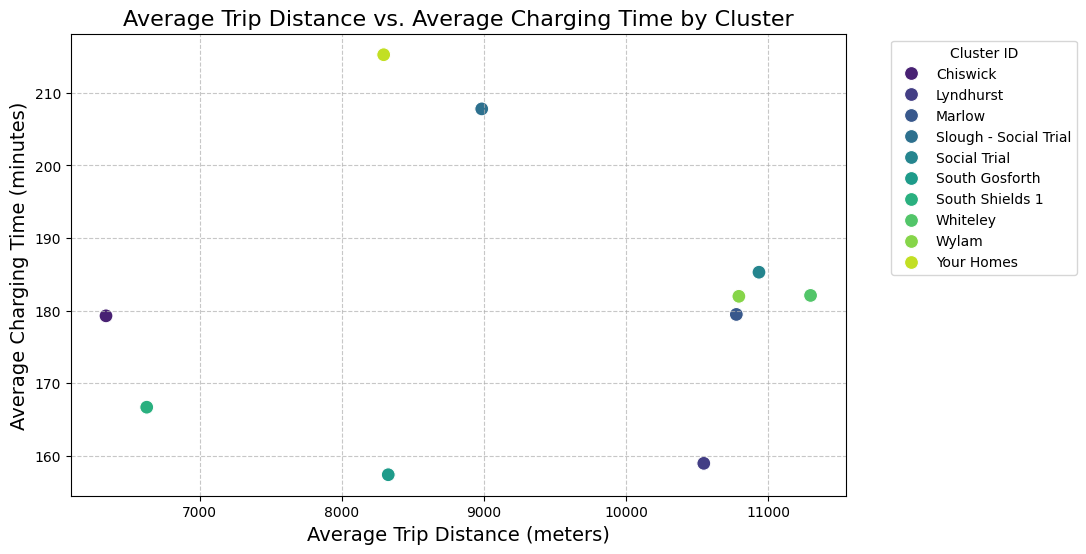

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_metrics, x='AvgTripDistance_m', y='AvgChargeTime_min', hue='ClusterID', palette='viridis', s=100)
plt.title('Average Trip Distance vs. Average Charging Time by Cluster', fontsize=16)
plt.xlabel('Average Trip Distance (meters)', fontsize=14)
plt.ylabel('Average Charging Time (minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


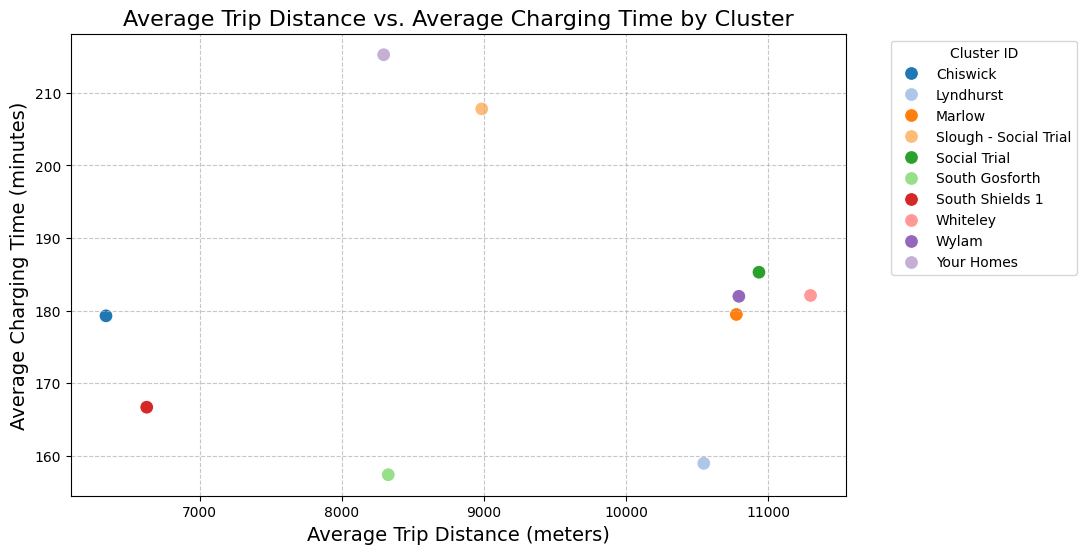

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_metrics, x='AvgTripDistance_m', y='AvgChargeTime_min', hue='ClusterID', palette='tab20', s=100)
plt.title('Average Trip Distance vs. Average Charging Time by Cluster', fontsize=16)
plt.xlabel('Average Trip Distance (meters)', fontsize=14)
plt.ylabel('Average Charging Time (minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


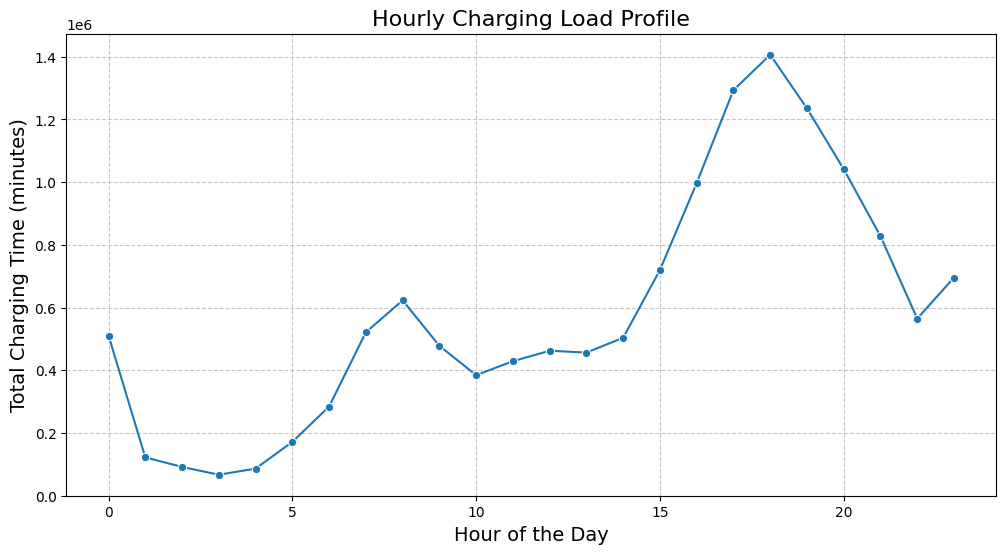

In [ ]:
# Aggregate charging events by hour
evchargedata_df['BatteryChargeStartDate'] = pd.to_datetime(evchargedata_df['BatteryChargeStartDate'])
evchargedata_df['Hour'] = evchargedata_df['BatteryChargeStartDate'].dt.hour

# Group by hour to calculate total charge time
hourly_load = evchargedata_df.groupby('Hour')['ChargeTime'].sum().reset_index()

# Plot load profile
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='ChargeTime', data=hourly_load, marker='o')
plt.title('Hourly Charging Load Profile', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Charging Time (minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-28-d0aae2f4caba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=evchargedata_df, x='Starting SoC (of 12)', y='Ending SoC (of 12)', palette='viridis')


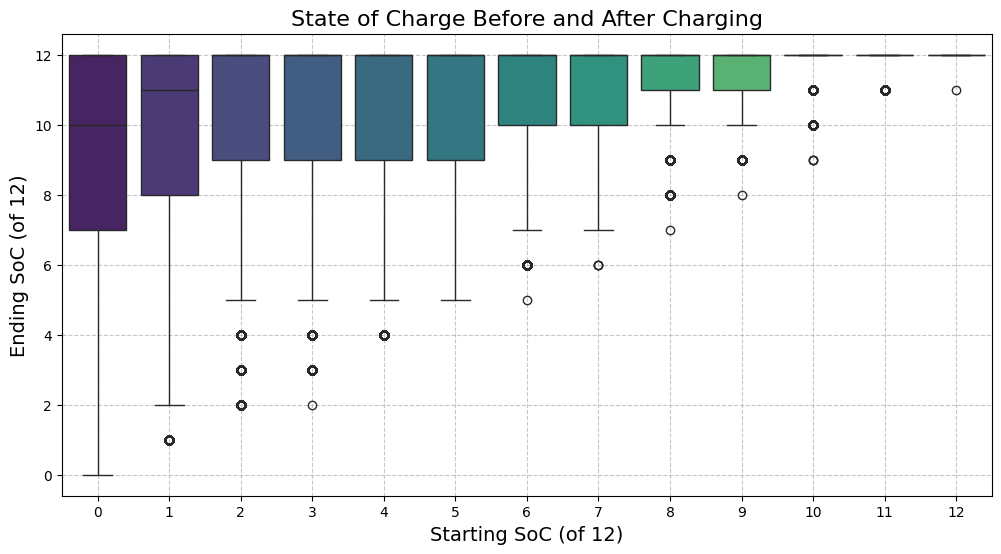

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=evchargedata_df, x='Starting SoC (of 12)', y='Ending SoC (of 12)', palette='viridis')
plt.title('State of Charge Before and After Charging', fontsize=16)
plt.xlabel('Starting SoC (of 12)', fontsize=14)
plt.ylabel('Ending SoC (of 12)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


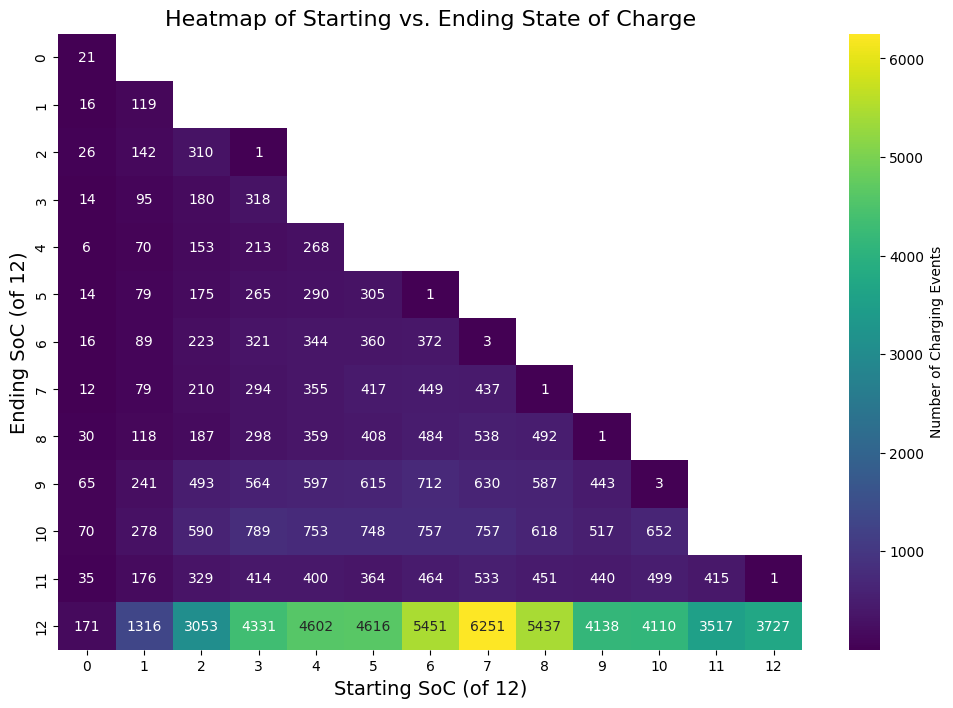

In [ ]:
# Create a pivot table for heatmap
soc_heatmap_data = evchargedata_df.pivot_table(
    index='Ending SoC (of 12)',
    columns='Starting SoC (of 12)',
    values='ChargeTime',
    aggfunc='count'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    soc_heatmap_data,
    annot=True,
    fmt=".0f",
    cmap='viridis',
    cbar_kws={'label': 'Number of Charging Events'}
)
plt.title('Heatmap of Starting vs. Ending State of Charge', fontsize=16)
plt.xlabel('Starting SoC (of 12)', fontsize=14)
plt.ylabel('Ending SoC (of 12)', fontsize=14)
plt.show()


In [ ]:
# Set a threshold for annotations (e.g., show only values > 10%)
annotation_data = soc_heatmap_percentage.where(soc_heatmap_percentage > 10, other="")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    soc_heatmap_percentage,
    annot=annotation_data,
    fmt=".1f",
    cmap='coolwarm',
    cbar_kws={'label': 'Percentage of Charging Events (%)'},
    linewidths=0.5
)
plt.title('Simplified Heatmap of Starting vs. Ending State of Charge', fontsize=16)
plt.xlabel('Starting SoC (of 12)', fontsize=14)
plt.ylabel('Ending SoC (of 12)', fontsize=14)
plt.show()



NameError: name 'soc_heatmap_percentage' is not defined

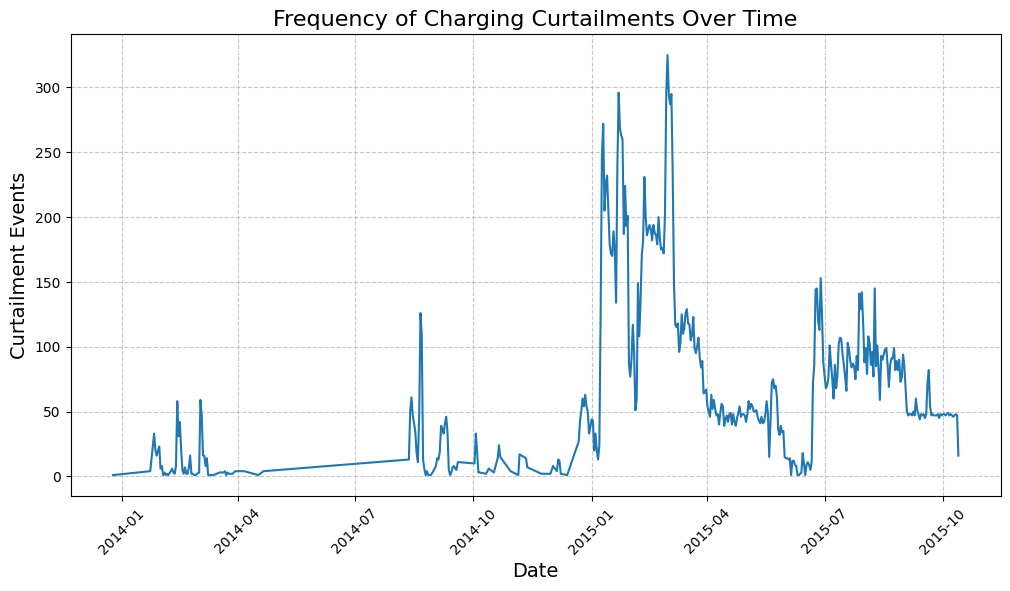

In [ ]:
# Aggregate curtailment events (SwitchState == 'Off')
switchstates_df['TimeStamp'] = pd.to_datetime(switchstates_df['TimeStamp'])
switchstates_df['Date'] = switchstates_df['TimeStamp'].dt.date
curtailment_events = switchstates_df[switchstates_df['SwitchState'] == 'Off']

# Group by date
curtailment_by_date = curtailment_events.groupby('Date').size().reset_index(name='CurtailmentEvents')

# Plot curtailment frequency
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='CurtailmentEvents', data=curtailment_by_date)
plt.title('Frequency of Charging Curtailments Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Curtailment Events', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

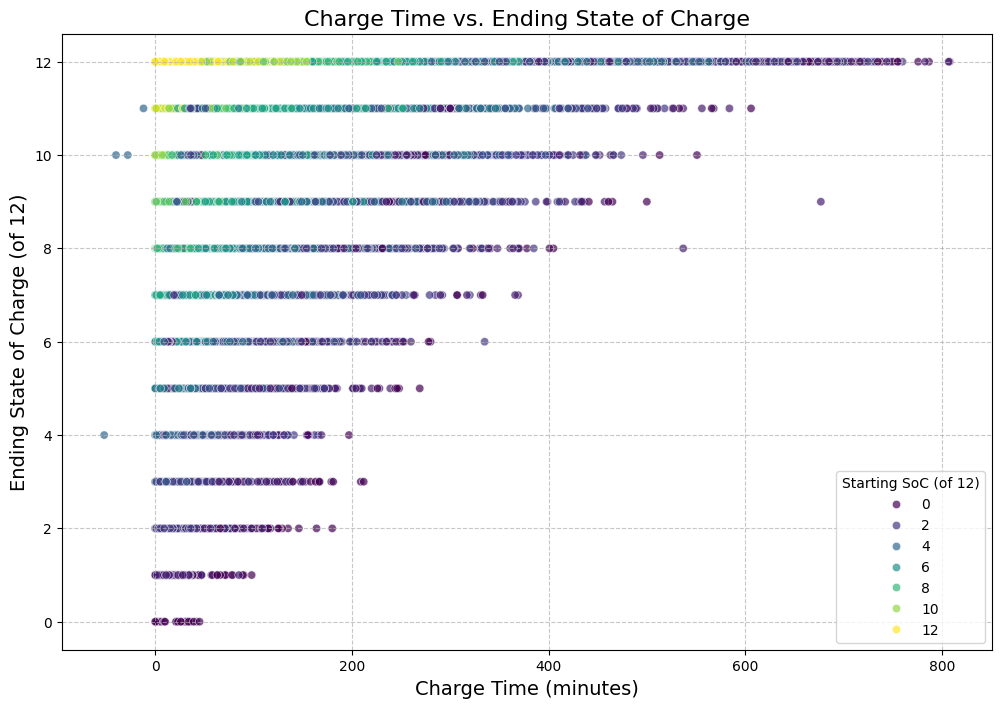

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=evchargedata_df, x='ChargeTime', y='Ending SoC (of 12)', hue='Starting SoC (of 12)', palette='viridis', alpha=0.7)
plt.title('Charge Time vs. Ending State of Charge', fontsize=16)
plt.xlabel('Charge Time (minutes)', fontsize=14)
plt.ylabel('Ending State of Charge (of 12)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(label='Starting SoC (of 12)')
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

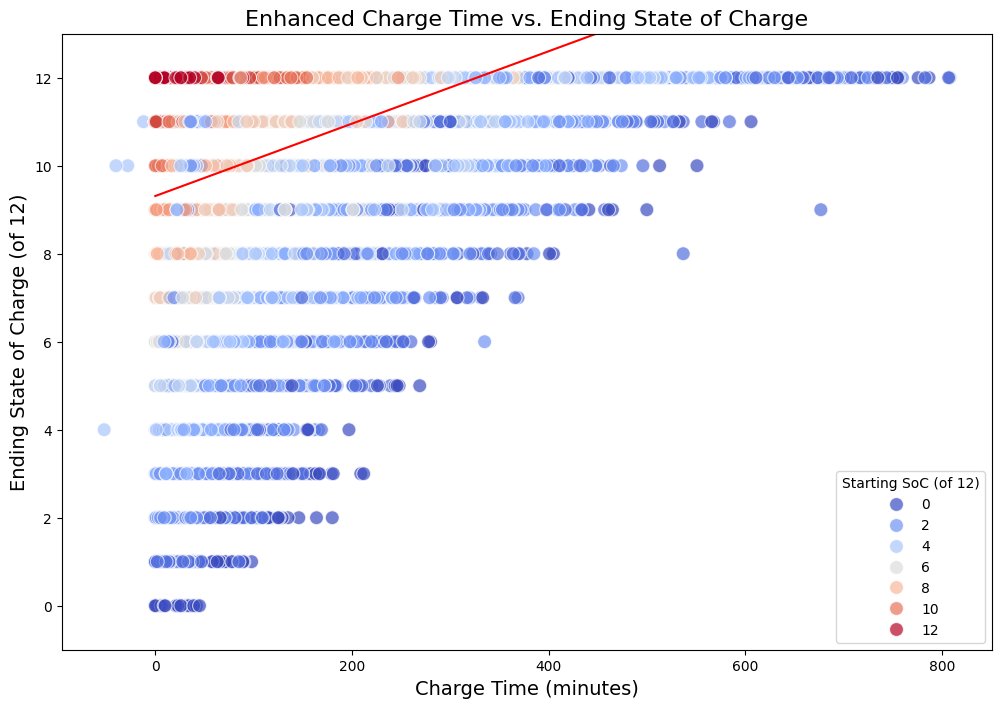

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 8))

# Scatter plot with color based on Starting SoC
sns.scatterplot(
    data=evchargedata_df,
    x='ChargeTime',
    y='Ending SoC (of 12)',
    hue='Starting SoC (of 12)',
    palette='coolwarm',
    alpha=0.7,
    s=100
)

# Add trendline
X = evchargedata_df['ChargeTime'].values.reshape(-1, 1)
y = evchargedata_df['Ending SoC (of 12)']
model = LinearRegression().fit(X, y)
plt.plot(
    np.linspace(0, evchargedata_df['ChargeTime'].max(), 100),
    model.predict(np.linspace(0, evchargedata_df['ChargeTime'].max(), 100).reshape(-1, 1)),
    color='red',
    label='Trendline'
)

# Adjust y-axis limit
plt.ylim(-1, 13)

# Titles, labels, and legend
plt.title('Enhanced Charge Time vs. Ending State of Charge', fontsize=16)
plt.xlabel('Charge Time (minutes)', fontsize=14)
plt.ylabel('Ending State of Charge (of 12)', fontsize=14)
plt.colorbar(label='Starting SoC (of 12)')
plt.legend(title='Starting SoC', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


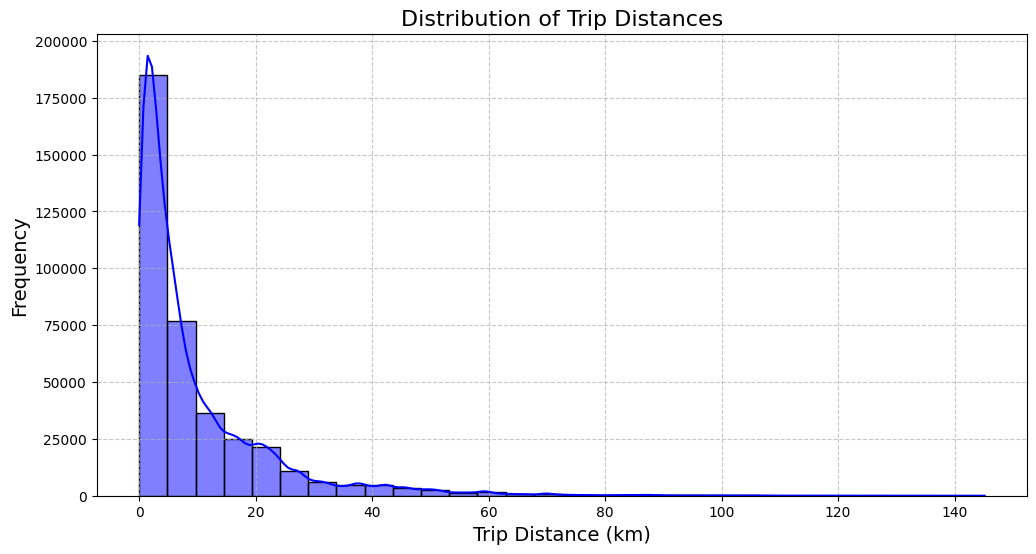

In [ ]:
# Convert trip distance to kilometers for easier interpretation
evtripdata_df['TripDistance_km'] = evtripdata_df['TripDistance (m)'] / 1000

plt.figure(figsize=(12, 6))
sns.histplot(evtripdata_df['TripDistance_km'], kde=True, bins=30, color='blue')
plt.title('Distribution of Trip Distances', fontsize=16)
plt.xlabel('Trip Distance (km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-35-f47af0e5af4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_metrics, x='ClusterID', y='AvgChargeTime_min', palette='viridis')


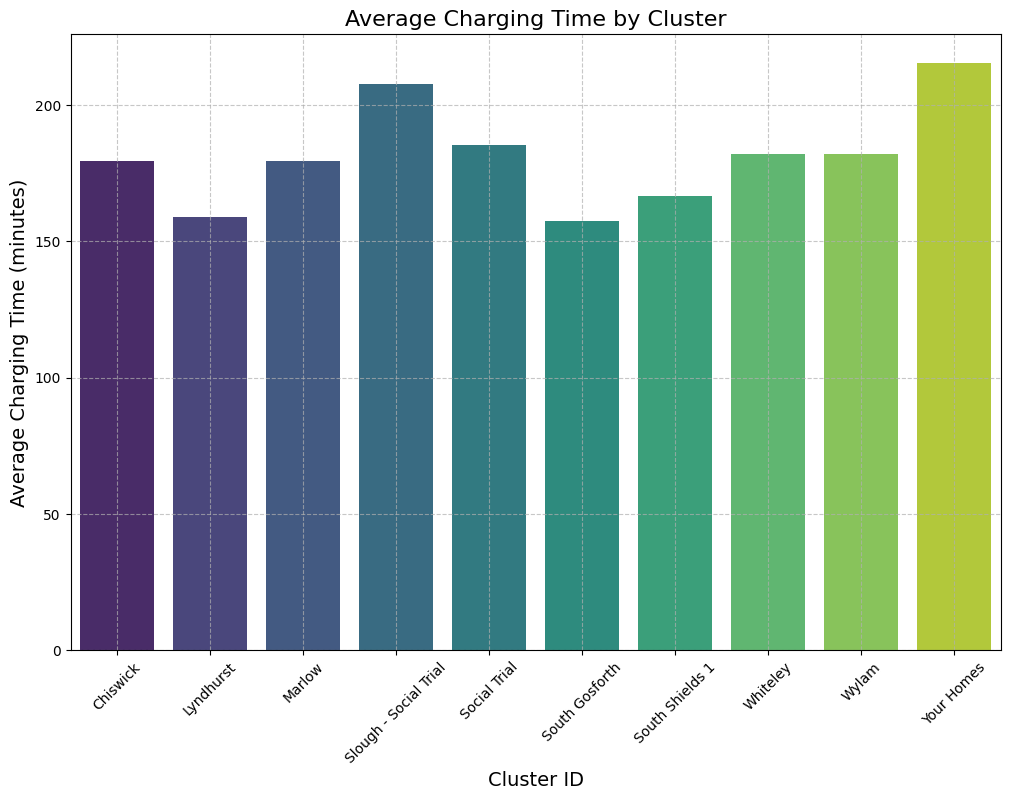

<ipython-input-35-f47af0e5af4b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_metrics, x='ClusterID', y='AvgTripDistance_m', palette='viridis')


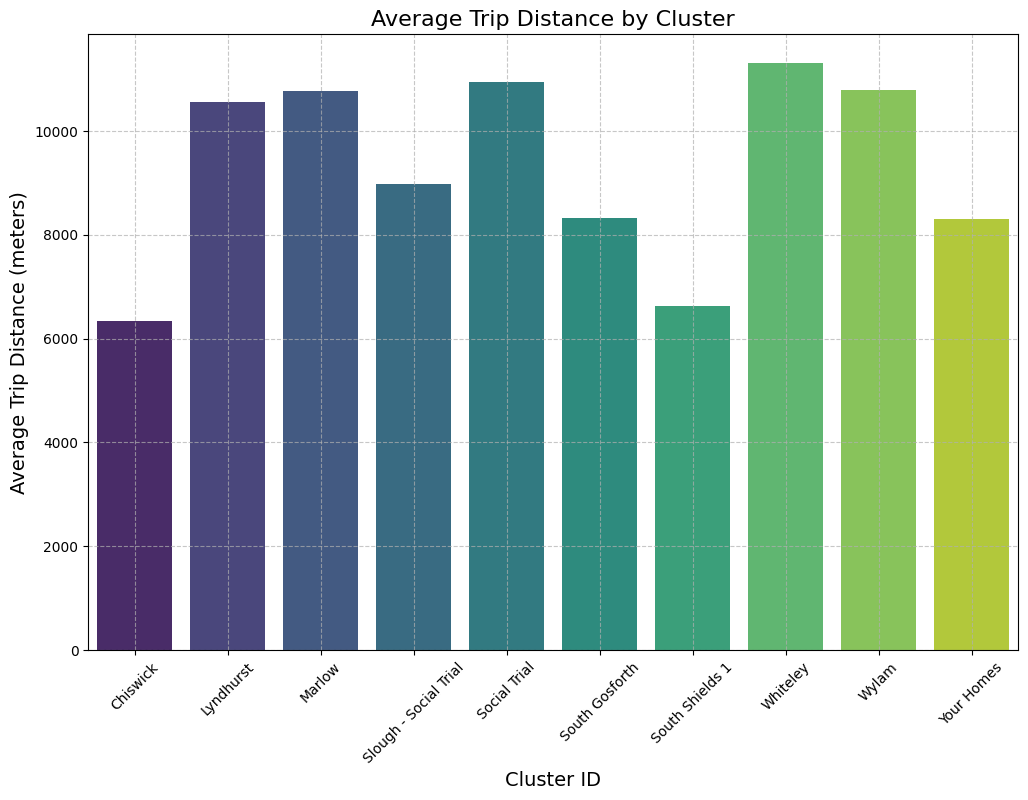

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_metrics, x='ClusterID', y='AvgChargeTime_min', palette='viridis')
plt.title('Average Charging Time by Cluster', fontsize=16)
plt.xlabel('Cluster ID', fontsize=14)
plt.ylabel('Average Charging Time (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_metrics, x='ClusterID', y='AvgTripDistance_m', palette='viridis')
plt.title('Average Trip Distance by Cluster', fontsize=16)
plt.xlabel('Cluster ID', fontsize=14)
plt.ylabel('Average Trip Distance (meters)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-36-0d25e2acdae4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='ChargingEvents', data=hourly_charging, palette='viridis')


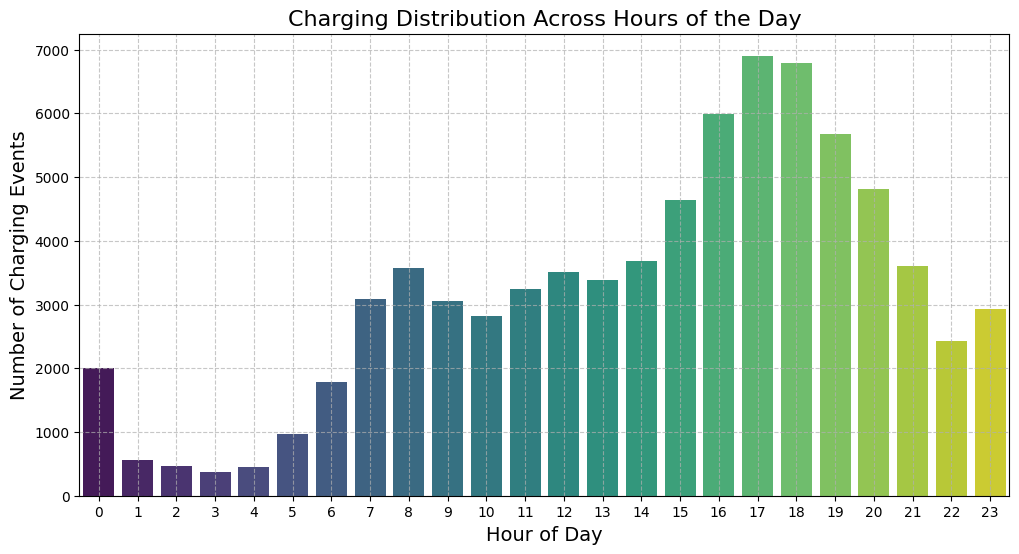

In [ ]:
# Group by hour of day to assess charging distribution
hourly_charging = evchargedata_df.groupby('Hour').size().reset_index(name='ChargingEvents')

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='ChargingEvents', data=hourly_charging, palette='viridis')
plt.title('Charging Distribution Across Hours of the Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Charging Events', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Step 1: Handle missing values
# Check missing values
print(evchargedata_df.isnull().sum())

# Drop rows with missing Starting or Ending SoC
evchargedata_df = evchargedata_df.dropna(subset=['Starting SoC (of 12)', 'Ending SoC (of 12)', 'ChargeTime'])

# Step 2: Validate and filter ranges
# Filter SoC values between 0 and 12
evchargedata_df = evchargedata_df[
    (evchargedata_df['Starting SoC (of 12)'] >= 0) & (evchargedata_df['Starting SoC (of 12)'] <= 12) &
    (evchargedata_df['Ending SoC (of 12)'] >= 0) & (evchargedata_df['Ending SoC (of 12)'] <= 12)
]

# Ensure ChargeTime is positive
evchargedata_df = evchargedata_df[evchargedata_df['ChargeTime'] > 0]

# Step 3: Remove duplicates
evchargedata_df = evchargedata_df.drop_duplicates()

# Step 4: Convert timestamps to datetime
if 'BatteryChargeStartDate' in evchargedata_df.columns:
    evchargedata_df['BatteryChargeStartDate'] = pd.to_datetime(evchargedata_df['BatteryChargeStartDate'])
if 'BatteryChargeStopDate' in evchargedata_df.columns:
    evchargedata_df['BatteryChargeStopDate'] = pd.to_datetime(evchargedata_df['BatteryChargeStopDate'])

# Step 5: Check for outliers (e.g., ChargeTime > 1000 minutes may be unusual)
q1 = evchargedata_df['ChargeTime'].quantile(0.25)
q3 = evchargedata_df['ChargeTime'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers in ChargeTime
evchargedata_df = evchargedata_df[
    (evchargedata_df['ChargeTime'] >= lower_bound) & (evchargedata_df['ChargeTime'] <= upper_bound)
]

# Step 6: Verify cleaned data
print(evchargedata_df.info())


ParticipantID               0
BatteryChargeStartDate      0
BatteryChargeStopDate       0
Starting SoC (of 12)        0
Ending SoC (of 12)          0
ChargeTime                  0
ChargeTimeCategory        694
Prefix                      0
Hour                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 75482 entries, 0 to 76697
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ParticipantID           75482 non-null  object        
 1   BatteryChargeStartDate  75482 non-null  datetime64[ns]
 2   BatteryChargeStopDate   75482 non-null  datetime64[ns]
 3   Starting SoC (of 12)    75482 non-null  int64         
 4   Ending SoC (of 12)      75482 non-null  int64         
 5   ChargeTime              75482 non-null  float64       
 6   ChargeTimeCategory      75482 non-null  category      
 7   Prefix                  75482 non-null  object        
 8   Hour     

In [ ]:
# Calculate the number of removed data points
original_count = len(evchargedata_df)
cleaned_count = len(evchargedata_df)
removed_count = original_count - cleaned_count

print(f"Original Data Points: {original_count}")
print(f"Cleaned Data Points: {cleaned_count}")
print(f"Removed Data Points: {removed_count}")
print(f"Percentage of Removed Data Points: {removed_count / original_count * 100:.2f}%")

# Summarize the removed data points
removed_data = evchargedata_df[~evchargedata_df.index.isin(evchargedata_df.index)]

# Analyze removed data statistics
print("Summary of Removed Data Points:")
print(removed_data.describe())

Original Data Points: 75482
Cleaned Data Points: 75482
Removed Data Points: 0
Percentage of Removed Data Points: 0.00%
Summary of Removed Data Points:
      BatteryChargeStartDate BatteryChargeStopDate  Starting SoC (of 12)  \
count                      0                     0                   0.0   
mean                     NaT                   NaT                   NaN   
min                      NaT                   NaT                   NaN   
25%                      NaT                   NaT                   NaN   
50%                      NaT                   NaT                   NaN   
75%                      NaT                   NaT                   NaN   
max                      NaT                   NaT                   NaN   
std                      NaN                   NaN                   NaN   

       Ending SoC (of 12)  ChargeTime  Hour  
count                 0.0         0.0   0.0  
mean                  NaN         NaN   NaN  
min                   NaN 

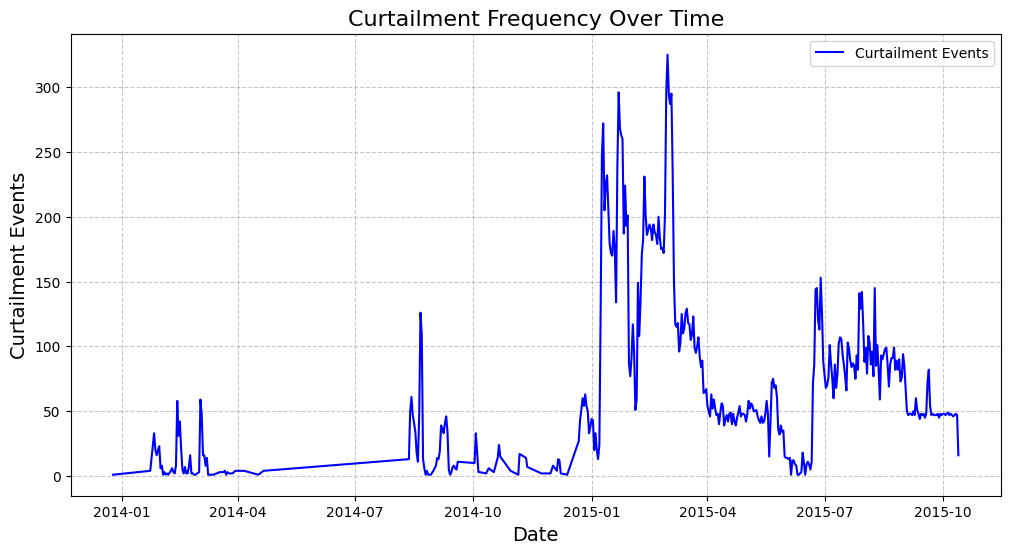

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'TimeStamp' is in datetime format
switchstates_df['TimeStamp'] = pd.to_datetime(switchstates_df['TimeStamp'])

# Filter curtailment events (SwitchState == 'Off')
curtailment_events = switchstates_df[switchstates_df['SwitchState'] == 'Off']

# Group by day and count curtailment events
curtailment_by_date = curtailment_events.groupby(curtailment_events['TimeStamp'].dt.date).size()

# Plot curtailment frequency over time
plt.figure(figsize=(12, 6))
curtailment_by_date.plot(kind='line', label='Curtailment Events', color='blue')
plt.title('Curtailment Frequency Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Curtailment Events', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()




In [ ]:
print(switchstates_df.columns)


Index(['ParticipantID', 'ICBSerialNumber', 'TimeStamp', 'SwitchState', 'Date'], dtype='object')


<ipython-input-43-4fbdb89faec5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curtailment_events['Hour'] = curtailment_events['TimeStamp'].dt.hour


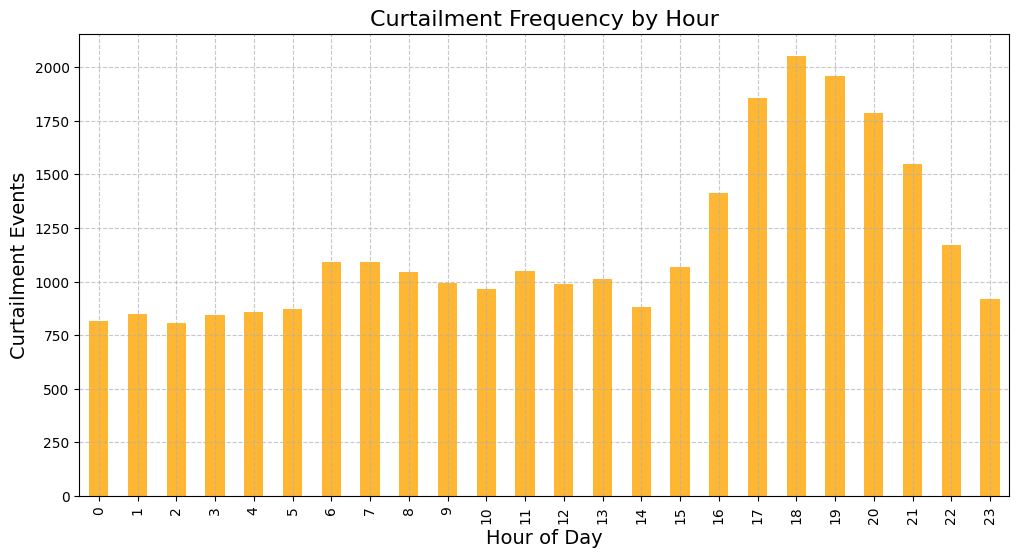

In [ ]:
# Extract the hour from the timestamp
curtailment_events['Hour'] = curtailment_events['TimeStamp'].dt.hour

# Group by hour and count curtailment events
curtailment_by_hour = curtailment_events.groupby('Hour').size()

# Plot
plt.figure(figsize=(12, 6))
curtailment_by_hour.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Curtailment Frequency by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Curtailment Events', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24), fontsize=10)
plt.show()



<ipython-input-44-d7d96be2197b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curtailment_events['DayOfWeek'] = curtailment_events['TimeStamp'].dt.dayofweek


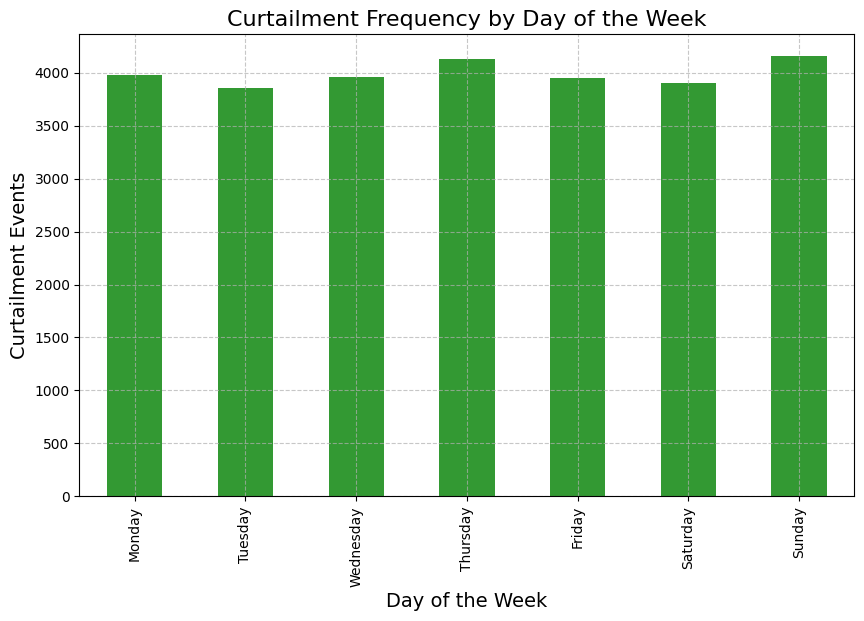

In [ ]:
# Extract day of the week (0 = Monday, 6 = Sunday)
curtailment_events['DayOfWeek'] = curtailment_events['TimeStamp'].dt.dayofweek

# Group by day of the week
curtailment_by_day = curtailment_events.groupby('DayOfWeek').size()

# Plot
plt.figure(figsize=(10, 6))
curtailment_by_day.plot(kind='bar', color='green', alpha=0.8)
plt.title('Curtailment Frequency by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Curtailment Events', fontsize=14)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-53-550429c629bc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grid_demand_df['TimeStamp'] = pd.to_datetime(grid_demand_df['SETTLEMENT_DATE']) + pd.to_timedelta(


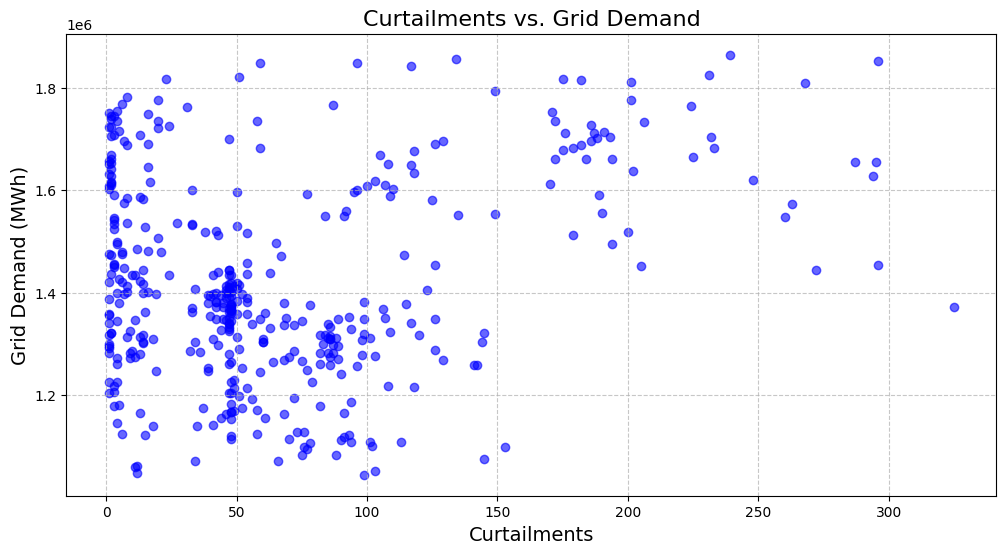

Correlation between Curtailments and Grid Demand: 0.25


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine SETTLEMENT_DATE and SETTLEMENT_PERIOD into a single timestamp
# Assuming SETTLEMENT_PERIOD represents half-hour intervals (1 = 00:00-00:30, 2 = 00:30-01:00, etc.)
grid_demand_df['TimeStamp'] = pd.to_datetime(grid_demand_df['SETTLEMENT_DATE']) + pd.to_timedelta(
    (grid_demand_df['SETTLEMENT_PERIOD'] - 1) * 30, unit='m'
)

# Aggregate total grid demand by date
grid_demand_by_date = grid_demand_df.groupby(grid_demand_df['TimeStamp'].dt.date)['ENGLAND_WALES_DEMAND'].sum()

# Merge curtailment and grid demand data
analysis_df = pd.DataFrame({
    'Curtailments': curtailment_by_date,
    'GridDemand': grid_demand_by_date
}).dropna()

# Plot the relationship between curtailments and grid demand
plt.figure(figsize=(12, 6))
plt.scatter(analysis_df['Curtailments'], analysis_df['GridDemand'], alpha=0.6, color='blue')
plt.title('Curtailments vs. Grid Demand', fontsize=16)
plt.xlabel('Curtailments', fontsize=14)
plt.ylabel('Grid Demand (MWh)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate and display the correlation
correlation = analysis_df.corr().loc['Curtailments', 'GridDemand']
print(f'Correlation between Curtailments and Grid Demand: {correlation:.2f}')




In [ ]:
print(curtailment_events.columns)


Index(['ParticipantID', 'ICBSerialNumber', 'TimeStamp', 'SwitchState', 'Date',
       'Hour', 'DayOfWeek'],
      dtype='object')


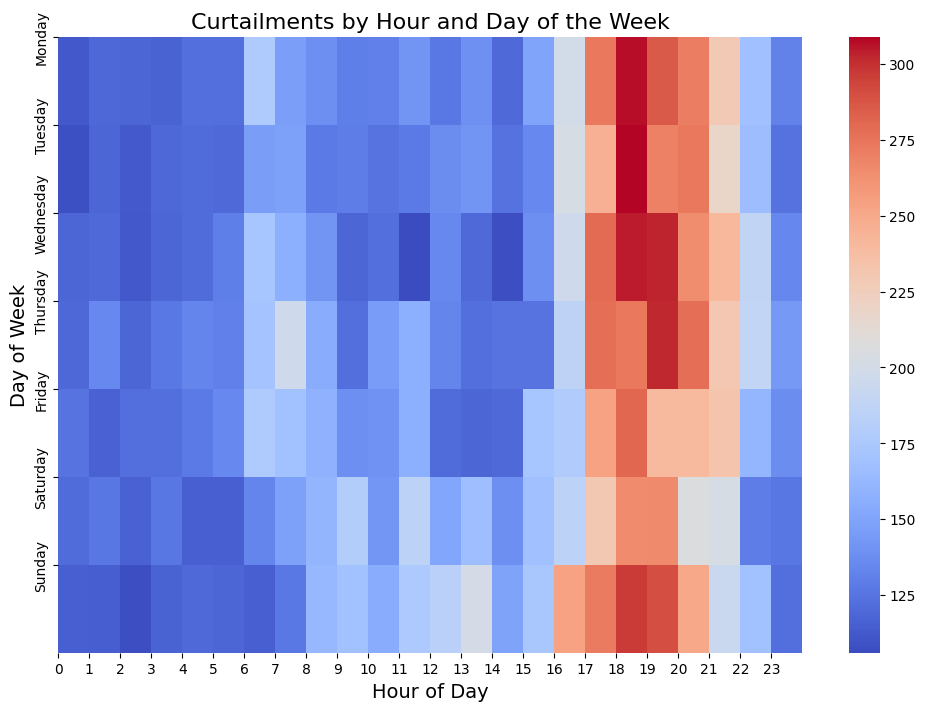

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Hour' and 'DayOfWeek' columns to the DataFrame
curtailment_events['Hour'] = curtailment_events['TimeStamp'].dt.hour
curtailment_events['DayOfWeek'] = curtailment_events['TimeStamp'].dt.dayofweek

# Group data by hour and day of the week
heatmap_data = curtailment_events.groupby(
    [curtailment_events['DayOfWeek'], curtailment_events['Hour']]
).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Curtailments by Hour and Day of the Week', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Day of Week', fontsize=14)
plt.xticks(ticks=np.arange(24), labels=np.arange(24), fontsize=10)
plt.yticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=10)
plt.show()

